# Guia 4

## Ejercicio 4

Las señales verifican que, cuanto más concentrada está su energía en cierta región del dominio temporal, más dispersa estará en el dominio frecuencial, y viceversa. Ejemplos extremos de esto son una señal senoidal, que tiene su energía distribuida a lo largo de toda la señal, pero en dominio frecuencial ésta se concentra en la frecuencia de la misma, y un delta de Dirac, que en dominio temporal tiene toda su energía concentrada en un instante, pero en dominio frecuencial contiene todas las frecuencias. **Explore esta propiedad utilizando ventanas temporales, más o menos concentradas alrededor de cierto tiempo, y calculando sus respectivas transformadas de Fourier.**

### Solución

Vamos a utilizar distintas ventanas temporales:

- Ventana rectangular: su energía se distribuye a lo largo de $[Tini,Tfin)$
$$\omega_R[n] = 1$$
- Ventana de Hann: la concentracion de la energía tiene una forma de campana empinada
$$\omega_h[n] = \frac{1}{2} - \frac{1}{2} cos\left(\frac{2\pi n}{N}\right)$$
- Ventana de Hamming: igual que la de Hann pero menos empinada
$$\omega_R[n] = \frac{27}{50} - \frac{23}{50} cos\left(\frac{2\pi n}{N}\right)$$
- Ventana de Bartlett: su energía se distribuye en forma de piramide
$$
\omega_R[n] =
\begin{cases}
    \frac{2n}{N}    &\quad 0<n\leq N/2\\
    2-\frac{2n}{N}  &\quad \frac{N}{2}<n\leq N
\end{cases}
$$
- Ventana de Blackman: 
$$\omega_R[n] = \frac{21}{50} - \frac{1}{2} cos\left(\frac{2\pi n}{N}\right) + \frac{2}{25} cos\left(\frac{4\pi n}{N}\right)$$

<StemContainer object of 3 artists>

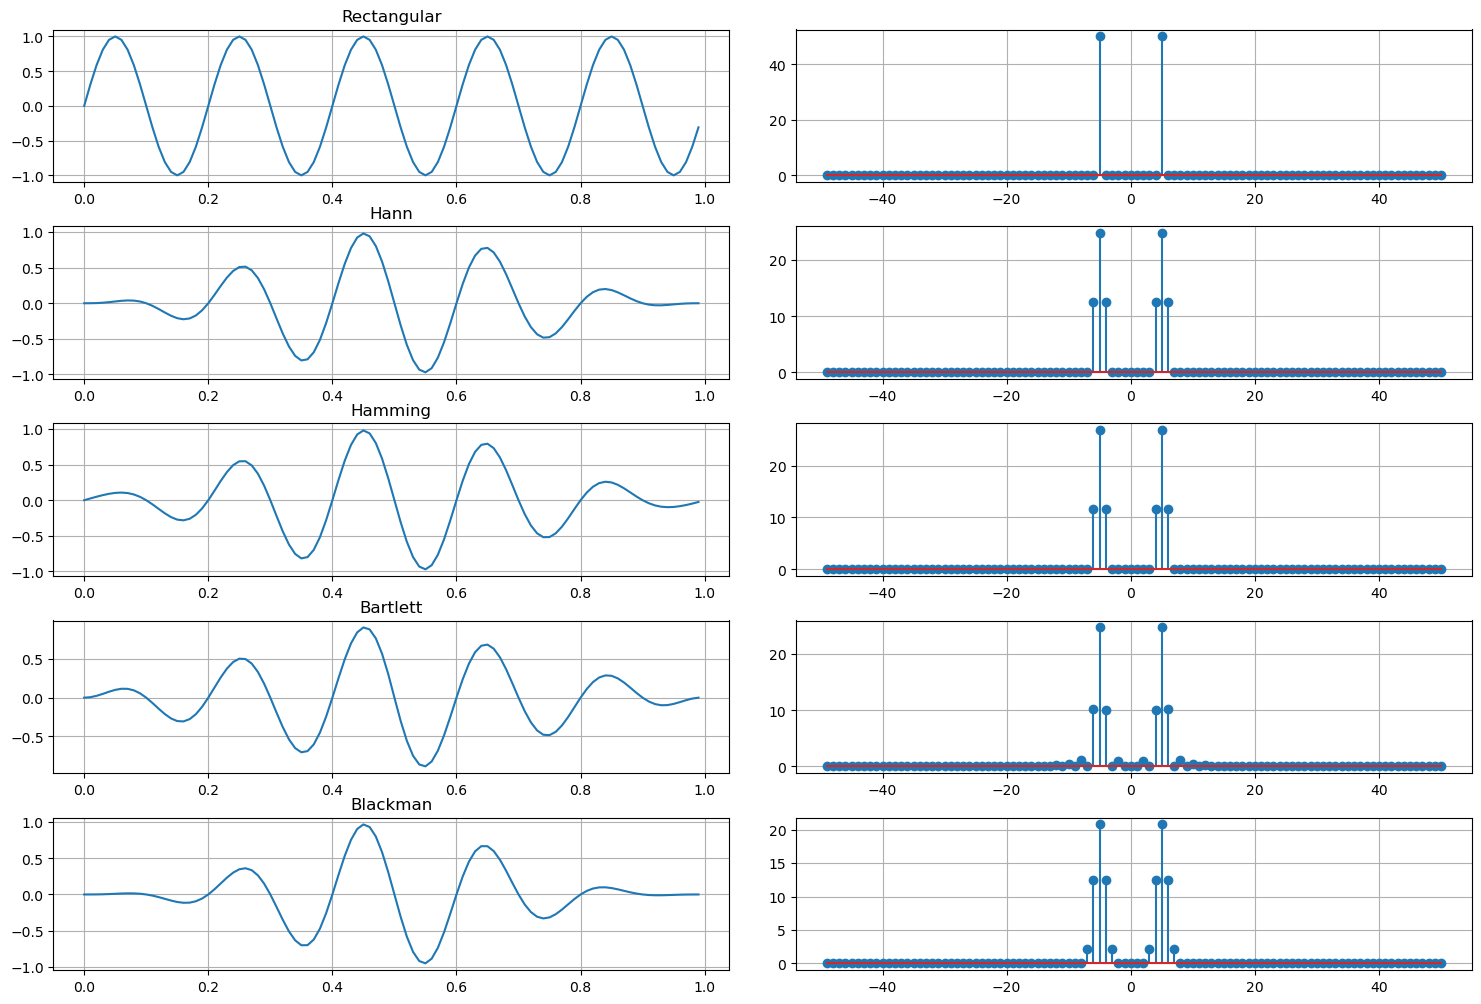

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def fourier(x):
    N = len(x)
    coefs = np.zeros(N, dtype=complex)  # vector de coeficientes
    aux1 = -2.0*np.pi/N                 # precalculamos valores que se repiten
    for k in range(N):
        aux2 = aux1*k                   # precalculamos (otros) valores que se repiten
        for n in range(N):
            coefs[k] += x[n]*np.exp(1j*aux2*n)
    return coefs

def rectangular(N):
    n = np.linspace(0,N,N)
    return [1 for _ in range(len(n))]

def hann(N):
    n = np.linspace(0,N,N)
    aux = 2*np.pi/N
    return [0.5 for _ in range(N)] - 0.5 * np.cos(aux*n)

def hamming(N):
    n = np.linspace(0,N,N)
    aux = 2*np.pi/N
    return [27/50 for _ in range(N)] - 23/50 * np.cos(aux*n)

def bartlett(N):
    n = np.linspace(0,N,N)
    aux = 2.0/N
    return np.where(np.less_equal(n,N/2.0),n*aux,[2 for _ in range(N)] - n*aux)

def blackman(N):
    n = np.linspace(0,N,N)
    aux = 2*np.pi/N
    return [21/50 for _ in range(N)] - 0.5*np.cos(aux*n) + (2/25)*np.cos(2*aux*n)

# Parametros
Tini = 0
Tfin = 1
fm = 100

# Generar senial
N = int(fm*(Tfin-Tini))
t = np.linspace(Tini,Tfin,N,endpoint=False)
s = np.sin(2*np.pi*t*5)

# Generar ventanas
ventRec = np.multiply(s,rectangular(N))
ventHann = np.multiply(s,hann(N))
ventHamming = np.multiply(s,hamming(N))
ventBartlett = np.multiply(s,bartlett(N))
ventBlackman = np.multiply(s,blackman(N))

# Calcular DFT
f = np.linspace(0,fm,N, endpoint=False)     # dominio de frecuencias
for k in range(int(N/2)+1,N):
    f[k] = f[k]-fm
ventRecF = fourier(ventRec) 
ventHannF = fourier(ventHann)
ventHammingF = fourier(ventHamming)
ventBartlettF = fourier(ventBartlett)
ventBlackmanF = fourier(ventBlackman)

# Graficas
fig, ax = plt.subplots(5,2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout()
for x in ax:
    for y in x:
        y.grid()
ax[0][0].set_title('Rectangular')
ax[1][0].set_title('Hann')
ax[2][0].set_title('Hamming')
ax[3][0].set_title('Bartlett')
ax[4][0].set_title('Blackman')

ax[0][0].plot(t,ventRec)
ax[1][0].plot(t,ventHann)
ax[2][0].plot(t,ventHamming)
ax[3][0].plot(t,ventBartlett)
ax[4][0].plot(t,ventBlackman)

ax[0][1].stem(f,np.abs(ventRecF))
ax[1][1].stem(f,np.abs(ventHannF))
ax[2][1].stem(f,np.abs(ventHammingF))
ax[3][1].stem(f,np.abs(ventBartlettF))
ax[4][1].stem(f,np.abs(ventBlackmanF))